In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array
from pandas import DataFrame

# How to Diagnose and Tune LSTMs
## 1) Evaluating LSTM Models Robustly
#### Split data into test and train sets and fit model multiple times.
## 2) Diagnosing Underfitting and Overfitting
## 3) Tune Problem Framing
## 4) Tune Model Structure
## 5) Tune Learning Behavior

In [4]:
# return training data
def get_train():
    seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
    seq = array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape((len(X), 1, 1))
    return X, y

In [5]:
# return validation data
def get_val():
    seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
    seq = array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape((len(X), 1, 1))
    return X, y

# Diagnostics plots

In [6]:
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1, 1)))
model.add(Dense(1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# compile model
model.compile(loss='mse', optimizer='adam')

In [8]:
# fit model
X, y = get_train()
valX, valY = get_val()
history = model.fit(X, y, epochs=100, validation_data=(valX, valY), shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 5 samples, validate on 5 samples
Epoch 1/100
5/5 [==============================] - 3s 572ms/step - loss: 0.1004 - val_loss: 0.5905
Epoch 2/100
5/5 [==============================] - 0s 558us/step - loss: 0.0994 - val_loss: 0.5871
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0984 - val_loss: 0.5831
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0972 - val_loss: 0.5794
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0960 - val_loss: 0.5756
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0949 - val_loss: 0.5717
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0937 - val_loss: 0.5678
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0925 - val_loss: 0.5639
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0914 - val_loss: 0.5600
Epoch 10/100
5/5 [===============

Epoch 81/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.2927
Epoch 82/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.2896
Epoch 83/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0256 - val_loss: 0.2865
Epoch 84/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.2834
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.2803
Epoch 86/100
5/5 [==============================] - 0s 558us/step - loss: 0.0242 - val_loss: 0.2773
Epoch 87/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.2743
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.2713
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.2684
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.2655
Epoch 91/100
5/5 [

## Underfit model : This can be diagnosed from a plot where the training loss is lower than the validation loss, and the validation loss has a trend that suggests further improvements are possible. 

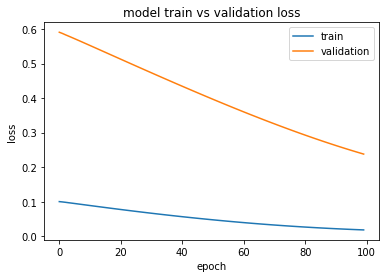

In [10]:
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [12]:
# define model
model2 = Sequential()
model2.add(LSTM(1, input_shape=(1,1)))
model2.add(Dense(1, activation= 'linear' ))

In [13]:
# compile model
model2.compile(loss= 'mae' , optimizer= 'sgd' )

In [14]:
# fit model
X,y = get_train()
valX, valY = get_val()
history = model2.fit(X, y, epochs=300, validation_data=(valX, valY), shuffle=False)

Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 1s 291ms/step - loss: 0.2971 - val_loss: 0.7797
Epoch 2/300
5/5 [==============================] - 0s 600us/step - loss: 0.2862 - val_loss: 0.7688
Epoch 3/300
5/5 [==============================] - 0s 902us/step - loss: 0.2753 - val_loss: 0.7579
Epoch 4/300
5/5 [==============================] - 0s 531us/step - loss: 0.2644 - val_loss: 0.7470
Epoch 5/300
5/5 [==============================] - 0s 457us/step - loss: 0.2535 - val_loss: 0.7361
Epoch 6/300
5/5 [==============================] - 0s 461us/step - loss: 0.2426 - val_loss: 0.7252
Epoch 7/300
5/5 [==============================] - 0s 505us/step - loss: 0.2317 - val_loss: 0.7144
Epoch 8/300
5/5 [==============================] - 0s 1ms/step - loss: 0.2208 - val_loss: 0.7035
Epoch 9/300
5/5 [==============================] - 0s 2ms/step - loss: 0.2098 - val_loss: 0.6926
Epoch 10/300
5/5 [==============================] - 0s 947us/step - los

Epoch 84/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1178 - val_loss: 0.4912
Epoch 85/300
5/5 [==============================] - 0s 687us/step - loss: 0.1176 - val_loss: 0.4890
Epoch 86/300
5/5 [==============================] - 0s 3ms/step - loss: 0.1178 - val_loss: 0.4911
Epoch 87/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1175 - val_loss: 0.4889
Epoch 88/300
5/5 [==============================] - 0s 996us/step - loss: 0.1178 - val_loss: 0.4910
Epoch 89/300
5/5 [==============================] - 0s 3ms/step - loss: 0.1175 - val_loss: 0.4888
Epoch 90/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1177 - val_loss: 0.4910
Epoch 91/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1175 - val_loss: 0.4887
Epoch 92/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1177 - val_loss: 0.4909
Epoch 93/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1175 - val_loss: 0.4886
Epoch 94/300
5/5

Epoch 167/300
5/5 [==============================] - 0s 590us/step - loss: 0.1166 - val_loss: 0.4854
Epoch 168/300
5/5 [==============================] - 0s 945us/step - loss: 0.1168 - val_loss: 0.4875
Epoch 169/300
5/5 [==============================] - 0s 3ms/step - loss: 0.1165 - val_loss: 0.4853
Epoch 170/300
5/5 [==============================] - 0s 5ms/step - loss: 0.1168 - val_loss: 0.4874
Epoch 171/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1165 - val_loss: 0.4852
Epoch 172/300
5/5 [==============================] - 0s 524us/step - loss: 0.1167 - val_loss: 0.4874
Epoch 173/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1165 - val_loss: 0.4851
Epoch 174/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.4873
Epoch 175/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1165 - val_loss: 0.4850
Epoch 176/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1167 - val_loss: 0.4872
Epoc

Epoch 250/300
5/5 [==============================] - 0s 897us/step - loss: 0.1157 - val_loss: 0.4839
Epoch 251/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1156 - val_loss: 0.4817
Epoch 252/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1157 - val_loss: 0.4838
Epoch 253/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1155 - val_loss: 0.4816
Epoch 254/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1157 - val_loss: 0.4838
Epoch 255/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1155 - val_loss: 0.4815
Epoch 256/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1157 - val_loss: 0.4837
Epoch 257/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1155 - val_loss: 0.4814
Epoch 258/300
5/5 [==============================] - 0s 462us/step - loss: 0.1156 - val_loss: 0.4836
Epoch 259/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1155 - val_loss: 0.4814
Epoch 

## Underfit model : less number of cells | a model may be underfit if performance on the training set is better than the validation set and performance has leveled off. 

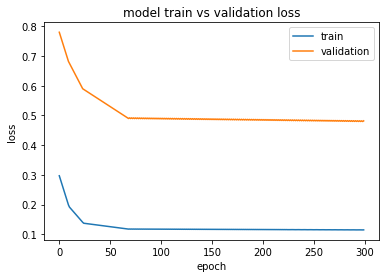

In [15]:
# plot train and validation loss
pyplot.plot(history.history[ 'loss' ])
pyplot.plot(history.history[ 'val_loss'])
pyplot.title( 'model train vs validation loss' )
pyplot.ylabel( 'loss' )
pyplot.xlabel( 'epoch' )
pyplot.legend([ 'train' , 'validation' ], loc= 'upper right' )
pyplot.show()

In [16]:
# define model
model3 = Sequential()
model3.add(LSTM(10, input_shape=(1,1)))
model3.add(Dense(1, activation= 'linear' ))

In [17]:
# compile model
model3.compile(loss= 'mse' , optimizer= 'adam' )

In [18]:
# fit model
X,y = get_train()
valX, valY = get_val()
history = model3.fit(X, y, epochs=800, validation_data=(valX, valY), shuffle=False)

Train on 5 samples, validate on 5 samples
Epoch 1/800
5/5 [==============================] - 2s 331ms/step - loss: 0.1136 - val_loss: 0.6822
Epoch 2/800
5/5 [==============================] - 0s 747us/step - loss: 0.1126 - val_loss: 0.6783
Epoch 3/800
5/5 [==============================] - 0s 1ms/step - loss: 0.1114 - val_loss: 0.6741
Epoch 4/800
5/5 [==============================] - 0s 1ms/step - loss: 0.1102 - val_loss: 0.6699
Epoch 5/800
5/5 [==============================] - 0s 1ms/step - loss: 0.1090 - val_loss: 0.6656
Epoch 6/800
5/5 [==============================] - 0s 1ms/step - loss: 0.1077 - val_loss: 0.6613
Epoch 7/800
5/5 [==============================] - 0s 756us/step - loss: 0.1065 - val_loss: 0.6570
Epoch 8/800
5/5 [==============================] - 0s 748us/step - loss: 0.1052 - val_loss: 0.6526
Epoch 9/800
5/5 [==============================] - 0s 480us/step - loss: 0.1040 - val_loss: 0.6483
Epoch 10/800
5/5 [==============================] - 0s 2ms/step - loss: 0.1

Epoch 84/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.3695
Epoch 85/800
5/5 [==============================] - 0s 558us/step - loss: 0.0348 - val_loss: 0.3663
Epoch 86/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0343 - val_loss: 0.3632
Epoch 87/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.3601
Epoch 88/800
5/5 [==============================] - 0s 651us/step - loss: 0.0332 - val_loss: 0.3570
Epoch 89/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0326 - val_loss: 0.3539
Epoch 90/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.3508
Epoch 91/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.3478
Epoch 92/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0310 - val_loss: 0.3447
Epoch 93/800
5/5 [==============================] - 0s 635us/step - loss: 0.0305 - val_loss: 0.3417
Epoch 94/800
5

Epoch 167/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1843
Epoch 168/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.1832
Epoch 169/800
5/5 [==============================] - 0s 774us/step - loss: 0.0131 - val_loss: 0.1820
Epoch 170/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.1809
Epoch 171/800
5/5 [==============================] - 0s 781us/step - loss: 0.0130 - val_loss: 0.1798
Epoch 172/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1787
Epoch 173/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.1777
Epoch 174/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.1766
Epoch 175/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.1756
Epoch 176/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.1746
Epoch 

Epoch 250/800
5/5 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.1322
Epoch 251/800
5/5 [==============================] - 0s 646us/step - loss: 0.0106 - val_loss: 0.1318
Epoch 252/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.1314
Epoch 253/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.1310
Epoch 254/800
5/5 [==============================] - 0s 909us/step - loss: 0.0105 - val_loss: 0.1306
Epoch 255/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1302
Epoch 256/800
5/5 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.1298
Epoch 257/800
5/5 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.1294
Epoch 258/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.1290
Epoch 259/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.1286
Epoch 

Epoch 333/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0990
Epoch 334/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0986
Epoch 335/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0982
Epoch 336/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0978
Epoch 337/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0974
Epoch 338/800
5/5 [==============================] - 0s 654us/step - loss: 0.0082 - val_loss: 0.0970
Epoch 339/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0966
Epoch 340/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0962
Epoch 341/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0958
Epoch 342/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0953
Epoch 34

5/5 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0661
Epoch 416/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0657
Epoch 417/800
5/5 [==============================] - 0s 703us/step - loss: 0.0059 - val_loss: 0.0654
Epoch 418/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0650
Epoch 419/800
5/5 [==============================] - 0s 823us/step - loss: 0.0059 - val_loss: 0.0646
Epoch 420/800
5/5 [==============================] - 0s 870us/step - loss: 0.0058 - val_loss: 0.0642
Epoch 421/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0638
Epoch 422/800
5/5 [==============================] - 0s 596us/step - loss: 0.0058 - val_loss: 0.0634
Epoch 423/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0630
Epoch 424/800
5/5 [==============================] - 0s 800us/step - loss: 0.0057 - val_loss: 0.0626
Epoch 425/800


Epoch 498/800
5/5 [==============================] - 0s 897us/step - loss: 0.0036 - val_loss: 0.0355
Epoch 499/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0352
Epoch 500/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0349
Epoch 501/800
5/5 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0345
Epoch 502/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0342
Epoch 503/800
5/5 [==============================] - 0s 785us/step - loss: 0.0035 - val_loss: 0.0339
Epoch 504/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0335
Epoch 505/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0332
Epoch 506/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0329
Epoch 507/800
5/5 [==============================] - 0s 522us/step - loss: 0.0034 - val_loss: 0.0326
Epoc

Epoch 581/800
5/5 [==============================] - 0s 705us/step - loss: 0.0017 - val_loss: 0.0125
Epoch 582/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0123
Epoch 583/800
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0121
Epoch 584/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0119
Epoch 585/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0117
Epoch 586/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0115
Epoch 587/800
5/5 [==============================] - 0s 507us/step - loss: 0.0016 - val_loss: 0.0113
Epoch 588/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0111
Epoch 589/800
5/5 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0109
Epoch 590/800
5/5 [==============================] - 0s 527us/step - loss: 0.0015 - val_loss: 0.0107
Epoc

Epoch 662/800
5/5 [==============================] - 0s 2ms/step - loss: 5.8060e-04 - val_loss: 0.0018
Epoch 663/800
5/5 [==============================] - 0s 634us/step - loss: 5.7159e-04 - val_loss: 0.0017
Epoch 664/800
5/5 [==============================] - 0s 2ms/step - loss: 5.6268e-04 - val_loss: 0.0016
Epoch 665/800
5/5 [==============================] - 0s 810us/step - loss: 5.5388e-04 - val_loss: 0.0016
Epoch 666/800
5/5 [==============================] - 0s 2ms/step - loss: 5.4519e-04 - val_loss: 0.0015
Epoch 667/800
5/5 [==============================] - 0s 1ms/step - loss: 5.3660e-04 - val_loss: 0.0015
Epoch 668/800
5/5 [==============================] - 0s 1ms/step - loss: 5.2812e-04 - val_loss: 0.0014
Epoch 669/800
5/5 [==============================] - 0s 2ms/step - loss: 5.1975e-04 - val_loss: 0.0014
Epoch 670/800
5/5 [==============================] - 0s 2ms/step - loss: 5.1149e-04 - val_loss: 0.0013
Epoch 671/800
5/5 [==============================] - 0s 708us/step - 

Epoch 739/800
5/5 [==============================] - 0s 3ms/step - loss: 1.5326e-04 - val_loss: 1.1737e-04
Epoch 740/800
5/5 [==============================] - 0s 1ms/step - loss: 1.5049e-04 - val_loss: 1.2487e-04
Epoch 741/800
5/5 [==============================] - 0s 2ms/step - loss: 1.4777e-04 - val_loss: 1.3278e-04
Epoch 742/800
5/5 [==============================] - 0s 2ms/step - loss: 1.4509e-04 - val_loss: 1.4108e-04
Epoch 743/800
5/5 [==============================] - 0s 472us/step - loss: 1.4247e-04 - val_loss: 1.4977e-04
Epoch 744/800
5/5 [==============================] - 0s 2ms/step - loss: 1.3989e-04 - val_loss: 1.5883e-04
Epoch 745/800
5/5 [==============================] - 0s 516us/step - loss: 1.3737e-04 - val_loss: 1.6825e-04
Epoch 746/800
5/5 [==============================] - 0s 935us/step - loss: 1.3489e-04 - val_loss: 1.7803e-04
Epoch 747/800
5/5 [==============================] - 0s 1ms/step - loss: 1.3245e-04 - val_loss: 1.8815e-04
Epoch 748/800
5/5 [============

## Well fit model : This can be diagnosed from a plot where the train and validation loss decrease and stabilize around the same point.

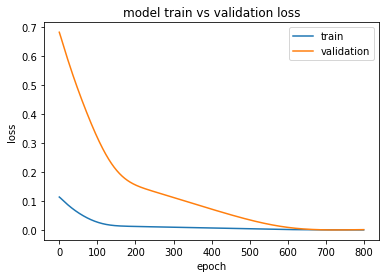

In [20]:
# plot train and validation loss
pyplot.plot(history.history[ 'loss' ])
pyplot.plot(history.history[ 'val_loss' ])
pyplot.title( 'model train vs validation loss')
pyplot.ylabel( 'loss' )
pyplot.xlabel( 'epoch' )
pyplot.legend([ 'train' , 'validation' ], loc= 'upper right' )
pyplot.show()

In [21]:
# define model
model4 = Sequential()
model4.add(LSTM(10, input_shape=(1,1)))
model4.add(Dense(1, activation= 'linear' ))

In [22]:
# compile model
model4.compile(loss= 'mse' , optimizer= 'adam' )

In [23]:
# fit model
X,y = get_train()
valX, valY = get_val()
history = model4.fit(X, y, epochs=1200, validation_data=(valX, valY), shuffle=False)

Train on 5 samples, validate on 5 samples
Epoch 1/1200
5/5 [==============================] - 2s 363ms/step - loss: 0.1127 - val_loss: 0.6762
Epoch 2/1200
5/5 [==============================] - 0s 664us/step - loss: 0.1117 - val_loss: 0.6724
Epoch 3/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1105 - val_loss: 0.6685
Epoch 4/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1093 - val_loss: 0.6644
Epoch 5/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.1080 - val_loss: 0.6603
Epoch 6/1200
5/5 [==============================] - 0s 700us/step - loss: 0.1068 - val_loss: 0.6561
Epoch 7/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1055 - val_loss: 0.6519
Epoch 8/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.1042 - val_loss: 0.6477
Epoch 9/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.1029 - val_loss: 0.6435
Epoch 10/1200
5/5 [==============================] - 0s 1ms/step - los

Epoch 83/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.3681
Epoch 84/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0330 - val_loss: 0.3648
Epoch 85/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0324 - val_loss: 0.3616
Epoch 86/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.3584
Epoch 87/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0313 - val_loss: 0.3552
Epoch 88/1200
5/5 [==============================] - 0s 492us/step - loss: 0.0307 - val_loss: 0.3521
Epoch 89/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.3490
Epoch 90/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.3459
Epoch 91/1200
5/5 [==============================] - 0s 672us/step - loss: 0.0292 - val_loss: 0.3428
Epoch 92/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0287 - val_loss: 0.3397
Epoch 

Epoch 165/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.1895
Epoch 166/1200
5/5 [==============================] - 0s 600us/step - loss: 0.0135 - val_loss: 0.1884
Epoch 167/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.1874
Epoch 168/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.1864
Epoch 169/1200
5/5 [==============================] - 0s 992us/step - loss: 0.0134 - val_loss: 0.1855
Epoch 170/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1845
Epoch 171/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1836
Epoch 172/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.1827
Epoch 173/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1818
Epoch 174/1200
5/5 [==============================] - 0s 792us/step - loss: 0.0132 - val_loss: 0

Epoch 247/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.1416
Epoch 248/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.1412
Epoch 249/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.1408
Epoch 250/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.1404
Epoch 251/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.1399
Epoch 252/1200
5/5 [==============================] - 0s 575us/step - loss: 0.0108 - val_loss: 0.1395
Epoch 253/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.1391
Epoch 254/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.1387
Epoch 255/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.1382
Epoch 256/1200
5/5 [==============================] - 0s 618us/step - loss: 0.0107 - val_loss: 0.1

Epoch 329/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.1061
Epoch 330/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.1057
Epoch 331/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.1052
Epoch 332/1200
5/5 [==============================] - 0s 721us/step - loss: 0.0084 - val_loss: 0.1048
Epoch 333/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.1044
Epoch 334/1200
5/5 [==============================] - 0s 791us/step - loss: 0.0083 - val_loss: 0.1039
Epoch 335/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.1035
Epoch 336/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.1031
Epoch 337/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.1026
Epoch 338/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.1

Epoch 411/1200
5/5 [==============================] - 0s 652us/step - loss: 0.0060 - val_loss: 0.0708
Epoch 412/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0704
Epoch 413/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0700
Epoch 414/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0696
Epoch 415/1200
5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0691
Epoch 416/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0687
Epoch 417/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0683
Epoch 418/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0679
Epoch 419/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0675
Epoch 420/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.067

Epoch 493/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0392
Epoch 494/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0389
Epoch 495/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0385
Epoch 496/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0382
Epoch 497/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0378
Epoch 498/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0375
Epoch 499/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0372
Epoch 500/1200
5/5 [==============================] - 0s 660us/step - loss: 0.0035 - val_loss: 0.0368
Epoch 501/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0365
Epoch 502/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.036

5/5 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0160
Epoch 575/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0158
Epoch 576/1200
5/5 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0156
Epoch 577/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0154
Epoch 578/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0151
Epoch 579/1200
5/5 [==============================] - 0s 855us/step - loss: 0.0017 - val_loss: 0.0149
Epoch 580/1200
5/5 [==============================] - 0s 591us/step - loss: 0.0017 - val_loss: 0.0147
Epoch 581/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0145
Epoch 582/1200
5/5 [==============================] - 0s 514us/step - loss: 0.0017 - val_loss: 0.0143
Epoch 583/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0141
Epoch 584

Epoch 655/1200
5/5 [==============================] - 0s 566us/step - loss: 6.7112e-04 - val_loss: 0.0037
Epoch 656/1200
5/5 [==============================] - 0s 803us/step - loss: 6.6162e-04 - val_loss: 0.0036
Epoch 657/1200
5/5 [==============================] - 0s 489us/step - loss: 6.5222e-04 - val_loss: 0.0035
Epoch 658/1200
5/5 [==============================] - 0s 3ms/step - loss: 6.4293e-04 - val_loss: 0.0034
Epoch 659/1200
5/5 [==============================] - 0s 892us/step - loss: 6.3374e-04 - val_loss: 0.0033
Epoch 660/1200
5/5 [==============================] - 0s 1ms/step - loss: 6.2464e-04 - val_loss: 0.0032
Epoch 661/1200
5/5 [==============================] - 0s 531us/step - loss: 6.1565e-04 - val_loss: 0.0031
Epoch 662/1200
5/5 [==============================] - 0s 949us/step - loss: 6.0675e-04 - val_loss: 0.0031
Epoch 663/1200
5/5 [==============================] - 0s 859us/step - loss: 5.9796e-04 - val_loss: 0.0030
Epoch 664/1200
5/5 [==============================

5/5 [==============================] - 0s 2ms/step - loss: 1.9504e-04 - val_loss: 1.8543e-04
Epoch 733/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.9162e-04 - val_loss: 1.7364e-04
Epoch 734/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.8826e-04 - val_loss: 1.6241e-04
Epoch 735/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.8496e-04 - val_loss: 1.5175e-04
Epoch 736/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.8170e-04 - val_loss: 1.4164e-04
Epoch 737/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.7850e-04 - val_loss: 1.3208e-04
Epoch 738/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.7535e-04 - val_loss: 1.2305e-04
Epoch 739/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.7225e-04 - val_loss: 1.1454e-04
Epoch 740/1200
5/5 [==============================] - 0s 518us/step - loss: 1.6920e-04 - val_loss: 1.0655e-04
Epoch 741/1200
5/5 [=====================

Epoch 808/1200
5/5 [==============================] - 0s 537us/step - loss: 4.9526e-05 - val_loss: 3.3089e-04
Epoch 809/1200
5/5 [==============================] - 0s 3ms/step - loss: 4.8677e-05 - val_loss: 3.4022e-04
Epoch 810/1200
5/5 [==============================] - 0s 3ms/step - loss: 4.7847e-05 - val_loss: 3.4960e-04
Epoch 811/1200
5/5 [==============================] - 0s 1ms/step - loss: 4.7033e-05 - val_loss: 3.5904e-04
Epoch 812/1200
5/5 [==============================] - 0s 1ms/step - loss: 4.6235e-05 - val_loss: 3.6854e-04
Epoch 813/1200
5/5 [==============================] - 0s 728us/step - loss: 4.5455e-05 - val_loss: 3.7807e-04
Epoch 814/1200
5/5 [==============================] - 0s 2ms/step - loss: 4.4690e-05 - val_loss: 3.8765e-04
Epoch 815/1200
5/5 [==============================] - 0s 508us/step - loss: 4.3941e-05 - val_loss: 3.9727e-04
Epoch 816/1200
5/5 [==============================] - 0s 1ms/step - loss: 4.3208e-05 - val_loss: 4.0693e-04
Epoch 817/1200
5/5 [==

Epoch 884/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.7664e-05 - val_loss: 0.0010
Epoch 885/1200
5/5 [==============================] - 0s 764us/step - loss: 1.7512e-05 - val_loss: 0.0010
Epoch 886/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.7363e-05 - val_loss: 0.0010
Epoch 887/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.7218e-05 - val_loss: 0.0011
Epoch 888/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.7076e-05 - val_loss: 0.0011
Epoch 889/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.6938e-05 - val_loss: 0.0011
Epoch 890/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.6803e-05 - val_loss: 0.0011
Epoch 891/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.6671e-05 - val_loss: 0.0011
Epoch 892/1200
5/5 [==============================] - 0s 613us/step - loss: 1.6543e-05 - val_loss: 0.0011
Epoch 893/1200
5/5 [==============================] - 0s 1ms

Epoch 963/1200
5/5 [==============================] - 0s 926us/step - loss: 1.2342e-05 - val_loss: 0.0014
Epoch 964/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.2321e-05 - val_loss: 0.0014
Epoch 965/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.2301e-05 - val_loss: 0.0015
Epoch 966/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.2281e-05 - val_loss: 0.0015
Epoch 967/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.2262e-05 - val_loss: 0.0015
Epoch 968/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.2243e-05 - val_loss: 0.0015
Epoch 969/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.2225e-05 - val_loss: 0.0015
Epoch 970/1200
5/5 [==============================] - 0s 538us/step - loss: 1.2207e-05 - val_loss: 0.0015
Epoch 971/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.2190e-05 - val_loss: 0.0015
Epoch 972/1200
5/5 [==============================] - 0s 692

Epoch 1041/1200
5/5 [==============================] - 0s 957us/step - loss: 1.1607e-05 - val_loss: 0.0016
Epoch 1042/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.1603e-05 - val_loss: 0.0016
Epoch 1043/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1600e-05 - val_loss: 0.0016
Epoch 1044/1200
5/5 [==============================] - 0s 932us/step - loss: 1.1596e-05 - val_loss: 0.0016
Epoch 1045/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1593e-05 - val_loss: 0.0016
Epoch 1046/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1589e-05 - val_loss: 0.0016
Epoch 1047/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1586e-05 - val_loss: 0.0016
Epoch 1048/1200
5/5 [==============================] - 0s 679us/step - loss: 1.1583e-05 - val_loss: 0.0016
Epoch 1049/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1579e-05 - val_loss: 0.0016
Epoch 1050/1200
5/5 [============================

Epoch 1119/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1412e-05 - val_loss: 0.0016
Epoch 1120/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1410e-05 - val_loss: 0.0016
Epoch 1121/1200
5/5 [==============================] - 0s 974us/step - loss: 1.1408e-05 - val_loss: 0.0016
Epoch 1122/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.1406e-05 - val_loss: 0.0016
Epoch 1123/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1404e-05 - val_loss: 0.0016
Epoch 1124/1200
5/5 [==============================] - 0s 979us/step - loss: 1.1402e-05 - val_loss: 0.0016
Epoch 1125/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.1400e-05 - val_loss: 0.0016
Epoch 1126/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1399e-05 - val_loss: 0.0016
Epoch 1127/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.1397e-05 - val_loss: 0.0016
Epoch 1128/1200
5/5 [==============================

Epoch 1197/1200
5/5 [==============================] - 0s 736us/step - loss: 1.1265e-05 - val_loss: 0.0016
Epoch 1198/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.1263e-05 - val_loss: 0.0016
Epoch 1199/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.1261e-05 - val_loss: 0.0016
Epoch 1200/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.1259e-05 - val_loss: 0.0016


## Overfit model : This can be diagnosed from a plot where the train loss slopes down and the validation loss slopes down, hits an inflection point, and starts to slope up again

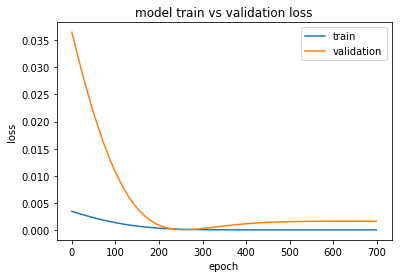

In [24]:
# plot train and validation loss
pyplot.plot(history.history[ 'loss' ][500:])
pyplot.plot(history.history[ 'val_loss' ][500:])
pyplot.title( 'model train vs validation loss' )
pyplot.ylabel( 'loss' )
pyplot.xlabel( 'epoch' )
pyplot.legend([ 'train' , 'validation' ], loc= 'upper right' )
pyplot.show()

### In this case the model training could be stopped at inflection point. Alternately, the number of training examples could be increased.

# Multiple runs

In [27]:
# collect data across multiple repeats
train = DataFrame()
val = DataFrame()
for i in range(5):
    # define model
    model = Sequential()
    model.add(LSTM(10, input_shape=(1,1)))
    model.add(Dense(1, activation= 'linear' ))
    # compile model
    model.compile(loss= 'mse' , optimizer= 'adam' )
    X,y = get_train()
    valX, valY = get_val()
    # fit model
    history = model.fit(X, y, epochs=300, validation_data=(valX, valY), shuffle=False)
    # story history
    train[str(i)] = history.history[ 'loss' ]
    val[str(i)] = history.history[ 'val_loss' ]

Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 2s 367ms/step - loss: 0.1262 - val_loss: 0.7743
Epoch 2/300
5/5 [==============================] - 0s 634us/step - loss: 0.1251 - val_loss: 0.7699
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1239 - val_loss: 0.7652
Epoch 4/300
5/5 [==============================] - 0s 750us/step - loss: 0.1226 - val_loss: 0.7604
Epoch 5/300
5/5 [==============================] - 0s 605us/step - loss: 0.1212 - val_loss: 0.7556
Epoch 6/300
5/5 [==============================] - 0s 842us/step - loss: 0.1199 - val_loss: 0.7507
Epoch 7/300
5/5 [==============================] - 0s 884us/step - loss: 0.1185 - val_loss: 0.7458
Epoch 8/300
5/5 [==============================] - 0s 640us/step - loss: 0.1172 - val_loss: 0.7409
Epoch 9/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1158 - val_loss: 0.7360
Epoch 10/300
5/5 [==============================] - 0s 873us/step - los

Epoch 84/300
5/5 [==============================] - 0s 971us/step - loss: 0.0443 - val_loss: 0.4417
Epoch 85/300
5/5 [==============================] - 0s 816us/step - loss: 0.0437 - val_loss: 0.4384
Epoch 86/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0431 - val_loss: 0.4352
Epoch 87/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0425 - val_loss: 0.4320
Epoch 88/300
5/5 [==============================] - 0s 693us/step - loss: 0.0419 - val_loss: 0.4287
Epoch 89/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.4255
Epoch 90/300
5/5 [==============================] - 0s 658us/step - loss: 0.0407 - val_loss: 0.4223
Epoch 91/300
5/5 [==============================] - 0s 867us/step - loss: 0.0401 - val_loss: 0.4191
Epoch 92/300
5/5 [==============================] - 0s 573us/step - loss: 0.0395 - val_loss: 0.4160
Epoch 93/300
5/5 [==============================] - 0s 953us/step - loss: 0.0389 - val_loss: 0.4128
Epoch 

Epoch 167/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.2300
Epoch 168/300
5/5 [==============================] - 0s 898us/step - loss: 0.0163 - val_loss: 0.2284
Epoch 169/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.2268
Epoch 170/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.2253
Epoch 171/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.2238
Epoch 172/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.2223
Epoch 173/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.2208
Epoch 174/300
5/5 [==============================] - 0s 796us/step - loss: 0.0158 - val_loss: 0.2194
Epoch 175/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.2180
Epoch 176/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.2166
Epoch 

Epoch 250/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.1585
Epoch 251/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.1580
Epoch 252/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.1575
Epoch 253/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.1571
Epoch 254/300
5/5 [==============================] - 0s 951us/step - loss: 0.0128 - val_loss: 0.1566
Epoch 255/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.1561
Epoch 256/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.1557
Epoch 257/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.1552
Epoch 258/300
5/5 [==============================] - 0s 690us/step - loss: 0.0127 - val_loss: 0.1547
Epoch 259/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.1543
Epoch 

Epoch 33/300
5/5 [==============================] - 0s 660us/step - loss: 0.0647 - val_loss: 0.4469
Epoch 34/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0637 - val_loss: 0.4432
Epoch 35/300
5/5 [==============================] - 0s 658us/step - loss: 0.0628 - val_loss: 0.4395
Epoch 36/300
5/5 [==============================] - 0s 713us/step - loss: 0.0618 - val_loss: 0.4358
Epoch 37/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.4321
Epoch 38/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0600 - val_loss: 0.4284
Epoch 39/300
5/5 [==============================] - 0s 551us/step - loss: 0.0590 - val_loss: 0.4247
Epoch 40/300
5/5 [==============================] - 0s 937us/step - loss: 0.0581 - val_loss: 0.4210
Epoch 41/300
5/5 [==============================] - 0s 859us/step - loss: 0.0572 - val_loss: 0.4174
Epoch 42/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.4137
Epoch 43

Epoch 116/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.1885
Epoch 117/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.1864
Epoch 118/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.1843
Epoch 119/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.1823
Epoch 120/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1802
Epoch 121/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.1782
Epoch 122/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.1762
Epoch 123/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.1743
Epoch 124/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.1724
Epoch 125/300
5/5 [==============================] - 0s 765us/step - loss: 0.0124 - val_loss: 0.1705
Epoch 12

Epoch 199/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0981
Epoch 200/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0976
Epoch 201/300
5/5 [==============================] - 0s 778us/step - loss: 0.0080 - val_loss: 0.0972
Epoch 202/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0968
Epoch 203/300
5/5 [==============================] - 0s 845us/step - loss: 0.0079 - val_loss: 0.0964
Epoch 204/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0960
Epoch 205/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0957
Epoch 206/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0953
Epoch 207/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0949
Epoch 208/300
5/5 [==============================] - 0s 811us/step - loss: 0.0078 - val_loss: 0.0945
Epoc

Epoch 282/300
5/5 [==============================] - 0s 616us/step - loss: 0.0062 - val_loss: 0.0715
Epoch 283/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0712
Epoch 284/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0709
Epoch 285/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0706
Epoch 286/300
5/5 [==============================] - 0s 915us/step - loss: 0.0061 - val_loss: 0.0703
Epoch 287/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0700
Epoch 288/300
5/5 [==============================] - 0s 666us/step - loss: 0.0061 - val_loss: 0.0697
Epoch 289/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0694
Epoch 290/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0691
Epoch 291/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0688
Epoc

Epoch 65/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0383 - val_loss: 0.3716
Epoch 66/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.3680
Epoch 67/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.3643
Epoch 68/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0362 - val_loss: 0.3608
Epoch 69/300
5/5 [==============================] - 0s 672us/step - loss: 0.0355 - val_loss: 0.3572
Epoch 70/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.3537
Epoch 71/300
5/5 [==============================] - 0s 590us/step - loss: 0.0342 - val_loss: 0.3502
Epoch 72/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.3467
Epoch 73/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0330 - val_loss: 0.3433
Epoch 74/300
5/5 [==============================] - 0s 783us/step - loss: 0.0323 - val_loss: 0.3399
Epoch 75/300
5

Epoch 148/300
5/5 [==============================] - 0s 804us/step - loss: 0.0121 - val_loss: 0.1733
Epoch 149/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.1721
Epoch 150/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.1709
Epoch 151/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.1698
Epoch 152/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.1686
Epoch 153/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.1675
Epoch 154/300
5/5 [==============================] - 0s 549us/step - loss: 0.0118 - val_loss: 0.1664
Epoch 155/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.1654
Epoch 156/300
5/5 [==============================] - 0s 582us/step - loss: 0.0117 - val_loss: 0.1643
Epoch 157/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.1633
Epoc

Epoch 231/300
5/5 [==============================] - 0s 936us/step - loss: 0.0094 - val_loss: 0.1194
Epoch 232/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.1190
Epoch 233/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.1186
Epoch 234/300
5/5 [==============================] - 0s 718us/step - loss: 0.0093 - val_loss: 0.1182
Epoch 235/300
5/5 [==============================] - 0s 677us/step - loss: 0.0092 - val_loss: 0.1178
Epoch 236/300
5/5 [==============================] - 0s 757us/step - loss: 0.0092 - val_loss: 0.1174
Epoch 237/300
5/5 [==============================] - 0s 783us/step - loss: 0.0092 - val_loss: 0.1170
Epoch 238/300
5/5 [==============================] - 0s 575us/step - loss: 0.0092 - val_loss: 0.1166
Epoch 239/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.1162
Epoch 240/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.115

Epoch 14/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0949 - val_loss: 0.6051
Epoch 15/300
5/5 [==============================] - 0s 675us/step - loss: 0.0936 - val_loss: 0.6004
Epoch 16/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0923 - val_loss: 0.5958
Epoch 17/300
5/5 [==============================] - 0s 570us/step - loss: 0.0911 - val_loss: 0.5912
Epoch 18/300
5/5 [==============================] - 0s 653us/step - loss: 0.0898 - val_loss: 0.5866
Epoch 19/300
5/5 [==============================] - 0s 607us/step - loss: 0.0886 - val_loss: 0.5821
Epoch 20/300
5/5 [==============================] - 0s 838us/step - loss: 0.0873 - val_loss: 0.5775
Epoch 21/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0861 - val_loss: 0.5730
Epoch 22/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0849 - val_loss: 0.5685
Epoch 23/300
5/5 [==============================] - 0s 768us/step - loss: 0.0837 - val_loss: 0.5641
Epoch 24

5/5 [==============================] - 0s 955us/step - loss: 0.0241 - val_loss: 0.2899
Epoch 98/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.2870
Epoch 99/300
5/5 [==============================] - 0s 518us/step - loss: 0.0233 - val_loss: 0.2841
Epoch 100/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.2813
Epoch 101/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.2784
Epoch 102/300
5/5 [==============================] - 0s 672us/step - loss: 0.0221 - val_loss: 0.2756
Epoch 103/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.2729
Epoch 104/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.2701
Epoch 105/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.2674
Epoch 106/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0207 - val_loss: 0.2647
Epoch 107/300
5/5 [=

Epoch 180/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.1475
Epoch 181/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.1468
Epoch 182/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.1461
Epoch 183/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.1455
Epoch 184/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.1448
Epoch 185/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.1442
Epoch 186/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.1435
Epoch 187/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.1429
Epoch 188/300
5/5 [==============================] - 0s 703us/step - loss: 0.0111 - val_loss: 0.1423
Epoch 189/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.1417
Epoch 19

Epoch 263/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.1097
Epoch 264/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.1093
Epoch 265/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.1089
Epoch 266/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.1086
Epoch 267/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.1082
Epoch 268/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.1078
Epoch 269/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.1074
Epoch 270/300
5/5 [==============================] - 0s 716us/step - loss: 0.0089 - val_loss: 0.1070
Epoch 271/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.1066
Epoch 272/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.1062
Epoch 27

Epoch 46/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0628 - val_loss: 0.5107
Epoch 47/300
5/5 [==============================] - 0s 687us/step - loss: 0.0618 - val_loss: 0.5063
Epoch 48/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.5019
Epoch 49/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0598 - val_loss: 0.4975
Epoch 50/300
5/5 [==============================] - 0s 892us/step - loss: 0.0588 - val_loss: 0.4932
Epoch 51/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.4889
Epoch 52/300
5/5 [==============================] - 0s 895us/step - loss: 0.0569 - val_loss: 0.4847
Epoch 53/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.4805
Epoch 54/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.4763
Epoch 55/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0542 - val_loss: 0.4721
Epoch 56/300
5

Epoch 129/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.2387
Epoch 130/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.2367
Epoch 131/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.2347
Epoch 132/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.2327
Epoch 133/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0165 - val_loss: 0.2308
Epoch 134/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.2288
Epoch 135/300
5/5 [==============================] - 0s 568us/step - loss: 0.0162 - val_loss: 0.2270
Epoch 136/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.2251
Epoch 137/300
5/5 [==============================] - 0s 548us/step - loss: 0.0159 - val_loss: 0.2233
Epoch 138/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.2215
Epoch 

Epoch 212/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.1481
Epoch 213/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.1475
Epoch 214/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.1470
Epoch 215/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.1465
Epoch 216/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.1460
Epoch 217/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.1455
Epoch 218/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.1450
Epoch 219/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.1445
Epoch 220/300
5/5 [==============================] - 0s 557us/step - loss: 0.0118 - val_loss: 0.1441
Epoch 221/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.1436
Epoch 22

Epoch 295/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.1118
Epoch 296/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.1114
Epoch 297/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.1110
Epoch 298/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.1106
Epoch 299/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.1101
Epoch 300/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.1097


## Multiple runs

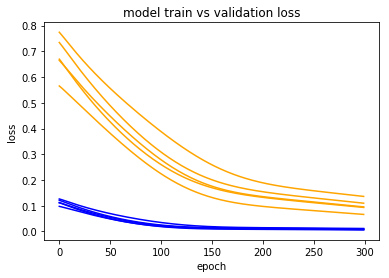

In [32]:
# plot train and validation loss across multiple runs
pyplot.plot(train, color= 'blue' , label= 'train' )
pyplot.plot(val, color= 'orange' , label= 'validation' )
pyplot.title( 'model train vs validation loss' )
pyplot.ylabel( 'loss' )
pyplot.xlabel( 'epoch' )
pyplot.show()

### In the resulting plot we can see that the general trend of underfitting holds across 5 runs and is a stronger case for perhaps increasing the number of training epochs.

# Selecting number of memory cells

## We cannot know the best number of memory cells for a given sequence prediction problem or LSTM architecture. You must test a suite of different memory cells in your LSTM hidden layers to see what works best.

### Try grid searching the number of memory cells by 100s, 10s, or finer. 
### Try using numbers of cells quoted in research papers.
### Try randomly searching the number of cells between 1 and 1000.

In [39]:
# fit an LSTM model
def fit_model(n_cells):
    # define model
    model = Sequential()
    model.add(LSTM(n_cells, input_shape=(1,1)))
    model.add(Dense(1, activation= 'linear' ))
    # compile model
    model.compile(loss= 'mse' , optimizer= 'adam' )
    # fit model
    X,y = get_train()
    history = model.fit(X, y, epochs=500, shuffle=False, verbose=0)
    # evaluate model
    valX, valY = get_val()
    loss = model.evaluate(valX, valY, verbose=0)
    return loss

In [40]:
# define scope of search
params = [1, 5, 10]
n_repeats = 5

In [45]:
# grid search parameter values
scores = DataFrame()
for value in params:
# repeat each experiment multiple times
    loss_values = list()
    for i in range(n_repeats):
        loss = fit_model(value)
        loss_values.append(loss)
        print(' >%d/%d param=%f, loss=%f' % (i+1, n_repeats, value, loss))
    # store results for this parameter
    scores[str(value)] = loss_values

 >1/5 param=1.000000, loss=0.196090
 >2/5 param=1.000000, loss=0.181114
 >3/5 param=1.000000, loss=0.156455
 >4/5 param=1.000000, loss=0.161929
 >5/5 param=1.000000, loss=0.381166
 >1/5 param=5.000000, loss=0.069449
 >2/5 param=5.000000, loss=0.069430
 >3/5 param=5.000000, loss=0.096187
 >4/5 param=5.000000, loss=0.043886
 >5/5 param=5.000000, loss=0.056022
 >1/5 param=10.000000, loss=0.038102
 >2/5 param=10.000000, loss=0.046268
 >3/5 param=10.000000, loss=0.027728
 >4/5 param=10.000000, loss=0.043540
 >5/5 param=10.000000, loss=0.011573


In [46]:
# summary statistics of results
print(scores.describe())

              1         5        10
count  5.000000  5.000000  5.000000
mean   0.215351  0.066995  0.033442
std    0.094022  0.019484  0.014134
min    0.156455  0.043886  0.011573
25%    0.161929  0.056022  0.027728
50%    0.181114  0.069430  0.038102
75%    0.196090  0.069449  0.043540
max    0.381166  0.096187  0.046268


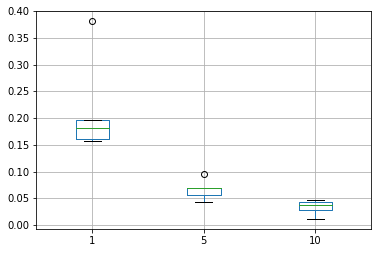

In [47]:
# box and whisker plot of results
scores.boxplot()
pyplot.show()

# Similarly we can also grid search no. of hidden layers in our model, try searching both (no. of memory cells and no. of hidden layers) together

# Other things to keep in mind and try diffrent options of them are :
## Value Scaling
### 1) Normalize Values. 2) Standardize Values.
## Value Encoding
### 1) Real-Value Encoding 2) Integer Encoding 3) One Hot Encoding 
## Stationarity
### 1) Remove Trends 2) Remove Seasonality 3) Remove Variance
## Input Sequence Length
### The lengthof the input sequence also impacts the Backpropagation through time used to estimate the error gradient when updating the weights. It can have an effect on how quickly the model learns and what is learned.
## Sequence model type
### 1) One-to-one 2) One-to-many 3) Many-to-one 4) Many-to-many
## Architecture
### As we have seen, there are many LSTM architectures to choose from. Some architectures lend themselves to certain sequence prediction problems, although most are flexible enough that they may be adapted to your sequence prediction problems. Test your assumptions of architecture suitability. Evaluate the skill of each LSTM architecture listed in this book (and perhaps beyond) on your sequence prediction problem.

## Weight Initialization
### The Keras LSTM layer uses the glorot uniform weight initialization by default. This weight initialization works well in general, but I have had great success using normal type weight initialization with LSTMs. Evaluate the e↵ect of di↵erent weight initialization schemes on your model skill. Keras o↵ers a great list of weight initialization schemes for you to try. At the very least, compare the skill of these four methods:
#### random_uniform
#### random_normal
#### glorot_uniform
#### glorot_normal


## Activation Functions
The activation function (technically the transfer function as it transfers the weighted activation
of the neuron) is often fixed by the framing and scale of the input or output layers. For example,
LSTMs use a sigmoid activation function for input and so inputs are often in the scale 0-1.
The classification or regression nature of the sequence prediction problem determines the type
of activation function to use in the output layer. Challenge the default of sigmoid activation
function in the LSTM layers. Try other methods, perhaps in tandem with rescaling input values.
### For example try:
### 1) sigmoid 2) tanh 3) relu
#### Further, challenge whether all LSTM layers in a stacked LSTM need to use the same activation function. In practice, I rarely see a model do better than using sigmoid, but this assumption should be confirmed.

## Optimization Algorithms
A good default implementation of gradient descent is the Adam algorithm. This is because it
automatically uses a custom learning rate for each parameter (weight) in the model, combining
the best properties of the AdaGrad and RMSProp methods. Further, the implementation of
Adam in Keras uses the best practice initial values for each of the configuration parameters.
Nevertheless, challenge that Adam is the right gradient descent algorithm for your model.
Evaluate the performance of models with different gradient descent algorithms. Some ideas of
well performing modern algorithms include:
Adam, RMSprop, Adagrad

## Learning Rate
The learning rate controls how much to update the weights in response to the estimated gradient at the end of each batch. This can have a large impact on the trade-off between how quickly or how well the model learns the problem. Consider using the classical stochastic gradient descent (SGD) optimizer and explore different learning rate and momentum values. More than just searching values, you can evaluate regimes that vary the learning rate.
#### Grid search learning rate values (e.g. 0.1, 0.001, 0.0001). 
#### Experiment with a learning rate that decays with the number of epochs (e.g. via callback). 
#### Experiment with updating a fit model with training runs with smaller and smaller learning rates.
The learning rate is tightly coupled with the number of epochs (number of passes through the training samples). Generally, the smaller the learning rate (e.g. 0.0001)), the more training epochs will be required. This is a linear relationship so the reverse is true, where fewer epochs are required for larger learning rates.

## Batch Size

In [54]:
# fit an LSTM model
def fit_model(n_batch):
    # define model
    model = Sequential()
    model.add(LSTM(10, input_shape=(1,1)))
    model.add(Dense(1, activation= 'linear' ))
    # compile model
    model.compile(loss= 'mse' , optimizer= 'adam' )
    # fit model
    X,y = get_train()
    history = model.fit(X, y, epochs=500, shuffle=False, verbose=0, batch_size=n_batch)
    # evaluate model
    valX, valY = get_val()
    loss = model.evaluate(valX, valY, verbose=0)
    return loss

In [55]:
# define scope of search
params = [1, 2, 3]
n_repeats = 5

In [57]:
# grid search parameter values
scores = DataFrame()
for value in params:
    # repeat each experiment multiple times
    loss_values = list()
    for i in range(n_repeats):
        loss = fit_model(value)
        loss_values.append(loss)
        print( '>%d/%d param=%f, loss=%f' % (i+1, n_repeats, value, loss))
    # store results for this parameter
    scores[str(value)] = loss_values

>1/5 param=1.000000, loss=0.001325
>2/5 param=1.000000, loss=0.001362
>3/5 param=1.000000, loss=0.001438
>4/5 param=1.000000, loss=0.000782
>5/5 param=1.000000, loss=0.000033
>1/5 param=2.000000, loss=0.000293
>2/5 param=2.000000, loss=0.000654
>3/5 param=2.000000, loss=0.000203
>4/5 param=2.000000, loss=0.001230
>5/5 param=2.000000, loss=0.000444
>1/5 param=3.000000, loss=0.002122
>2/5 param=3.000000, loss=0.002735
>3/5 param=3.000000, loss=0.000380
>4/5 param=3.000000, loss=0.001651
>5/5 param=3.000000, loss=0.001902


In [58]:
# summary statistics of results
print(scores.describe())

              1         2         3
count  5.000000  5.000000  5.000000
mean   0.000988  0.000565  0.001758
std    0.000594  0.000409  0.000869
min    0.000033  0.000203  0.000380
25%    0.000782  0.000293  0.001651
50%    0.001325  0.000444  0.001902
75%    0.001362  0.000654  0.002122
max    0.001438  0.001230  0.002735


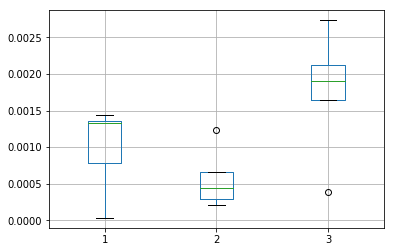

In [59]:
# box and whisker plot of results
scores.boxplot()
pyplot.show()

## Regularization
## Early Stopping via Callback
The number of training epochs can be very time consuming to tune. An alternative approach is
to configure a large number of training epochs. Then setup something to check the performance
of the model on train and validation datasets and stop training if it looks like the model is
starting to over learn. As such, early stopping is a type of regularization to curb overfitting.
You can experiment with early stopping in Keras with an EarlyStopping callback. It
requires that you specify a few configuration parameters, such as the metric to monitor (e.g.
val loss), the number of epochs over which no improvement in the monitored metric are
observed (e.g. 100). A list of callbacks is provided to the fit() function when training the
model. 

#### For example:
#### from keras.callbacks import EarlyStopping
#### es = EarlyStopping(monitor= val_loss , min_delta=100)
#### model.fit(..., callbacks=[es])